<a href="https://www.kaggle.com/code/ambrustorok/titanic?scriptVersionId=161441422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analysis

In [1]:
import pandas as pd
import pathlib
import numpy as np

In [2]:
path = pathlib.Path('/kaggle/input/titanic')

train = pd.read_csv(path / 'train.csv')
data_for_submission = pd.read_csv(path / 'test.csv')
sample_submission = pd.read_csv(path / 'gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_for_submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
# Check null rate in each column

percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
# missing_value_df
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Transform data
We take our train dataset and modify it such, that it only has numerical values present.

After that, we split it in order to create a model (`train_test_split`).

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [7]:
# Check null rate in each column

percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
# missing_value_df
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Categorical data

*Sex* and *Embarked* are categorical, later we will use one-hot encoding to transform them.

But now, we are turning them into numerical values, to perform more operations on them (impute data).

In [8]:
from sklearn.preprocessing import LabelEncoder

# labelencoder = LabelEncoder()

# labelencoder.fit(["C", "Q", "S", "nan"])
# train['Embarked'] = labelencoder.transform(train['Embarked'])

# labelencoder.fit(["male", "female"])
# train['Sex'] = labelencoder.fit_transform(train['Sex'])

encoders = dict()

for col_name in ["Sex", "Embarked"]:
    series = train[col_name]
    label_encoder = LabelEncoder()
    train[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0.0


## Unnecessary columns

We can see that column *Cabin* has 77.1% of data missing, so that is best to be dropped.

*Ticket*, *Name* and *PassengerId* contain unique values that are not useful in this case, so we will not need those either. 

<!-- We don't have to keep *PassengerId*, as we are just simply keeping the order of our records. -->

In [9]:
train = train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

## Imputable columns 

We can also see that 19.86% of *Age* and 0.22% of *Embarked* is missing. These can be imputed bz different algorithms. 

*Age* is a continous value, so we are going to use MICE (Multiple Imputation by Chained Equations) to calculate them, while *Embarked* is categorical, so we will use ... for that.

In [10]:
set(train['Embarked'])

{0.0, 1.0, 2.0, nan, nan}

In [11]:
# Age

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman', random_state=42)
train_imputed = imp.fit_transform(train)

ages = [row[train.columns.get_loc("Age")] for row in train_imputed]
embarkeds = [row[train.columns.get_loc("Embarked")] for row in train_imputed]
train["Age"] = ages
train["Embarked"] = embarkeds
train["Embarked"] = train["Embarked"].astype(int)

train

[IterativeImputer] Completing matrix with shape (891, 8)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Change: 35.14501807136603, scaled tolerance: 0.5123292 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.05
[IterativeImputer] Change: 0.03417234099583766, scaled tolerance: 0.5123292 
[IterativeImputer] Early stopping criterion reached.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,23.620164,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


## One-hot encode categorical data

In [12]:
train = pd.get_dummies(train,prefix=["Sex","Embarked"],columns=['Sex','Embarked'])
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True
888,0,3,23.620164,1,2,23.4500,True,False,False,False,True
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False


## Standardize

We want to standardize so all columns contribute equally to the ourpu

In [13]:
train[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']] = StandardScaler().fit_transform(train[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']])
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,0,0.827377,-0.528912,0.432793,-0.473674,-0.502445,False,True,False,False,True
1,1,-1.566107,0.636840,0.432793,-0.473674,0.786845,True,False,True,False,False
2,1,0.827377,-0.237474,-0.474545,-0.473674,-0.488854,True,False,False,False,True
3,1,-1.566107,0.418261,0.432793,-0.473674,0.420730,True,False,False,False,True
4,0,0.827377,0.418261,-0.474545,-0.473674,-0.486337,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369365,-0.164615,-0.474545,-0.473674,-0.386671,False,True,False,False,True
887,1,-1.566107,-0.747491,-0.474545,-0.473674,-0.044381,True,False,False,False,True
888,0,0.827377,-0.410868,0.432793,2.008933,-0.176263,True,False,False,False,True
889,1,-1.566107,-0.237474,-0.474545,-0.473674,-0.044381,False,True,True,False,False


# Prediction

Data is preprocessed, time to try to make predictions.

This is a binary classification problem, we are predicting of a person survives or not. 

Does not seem like we will have linear data, so no linear regression. We have multiple decision points, so let's try a Random Forest I guess, let's see where that leads us.

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,-8.772133e-17,-2.153160e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,0.486592,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,0.000000,-1.566107e+00,-2.528928e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,0.000000,-3.693648e-01,-6.017719e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000,8.273772e-01,-4.981519e-02,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,1.000000,8.273772e-01,5.332871e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,1.000000,8.273772e-01,3.696940e+00,6.784163e+00,6.974147e+00,9.667167e+00


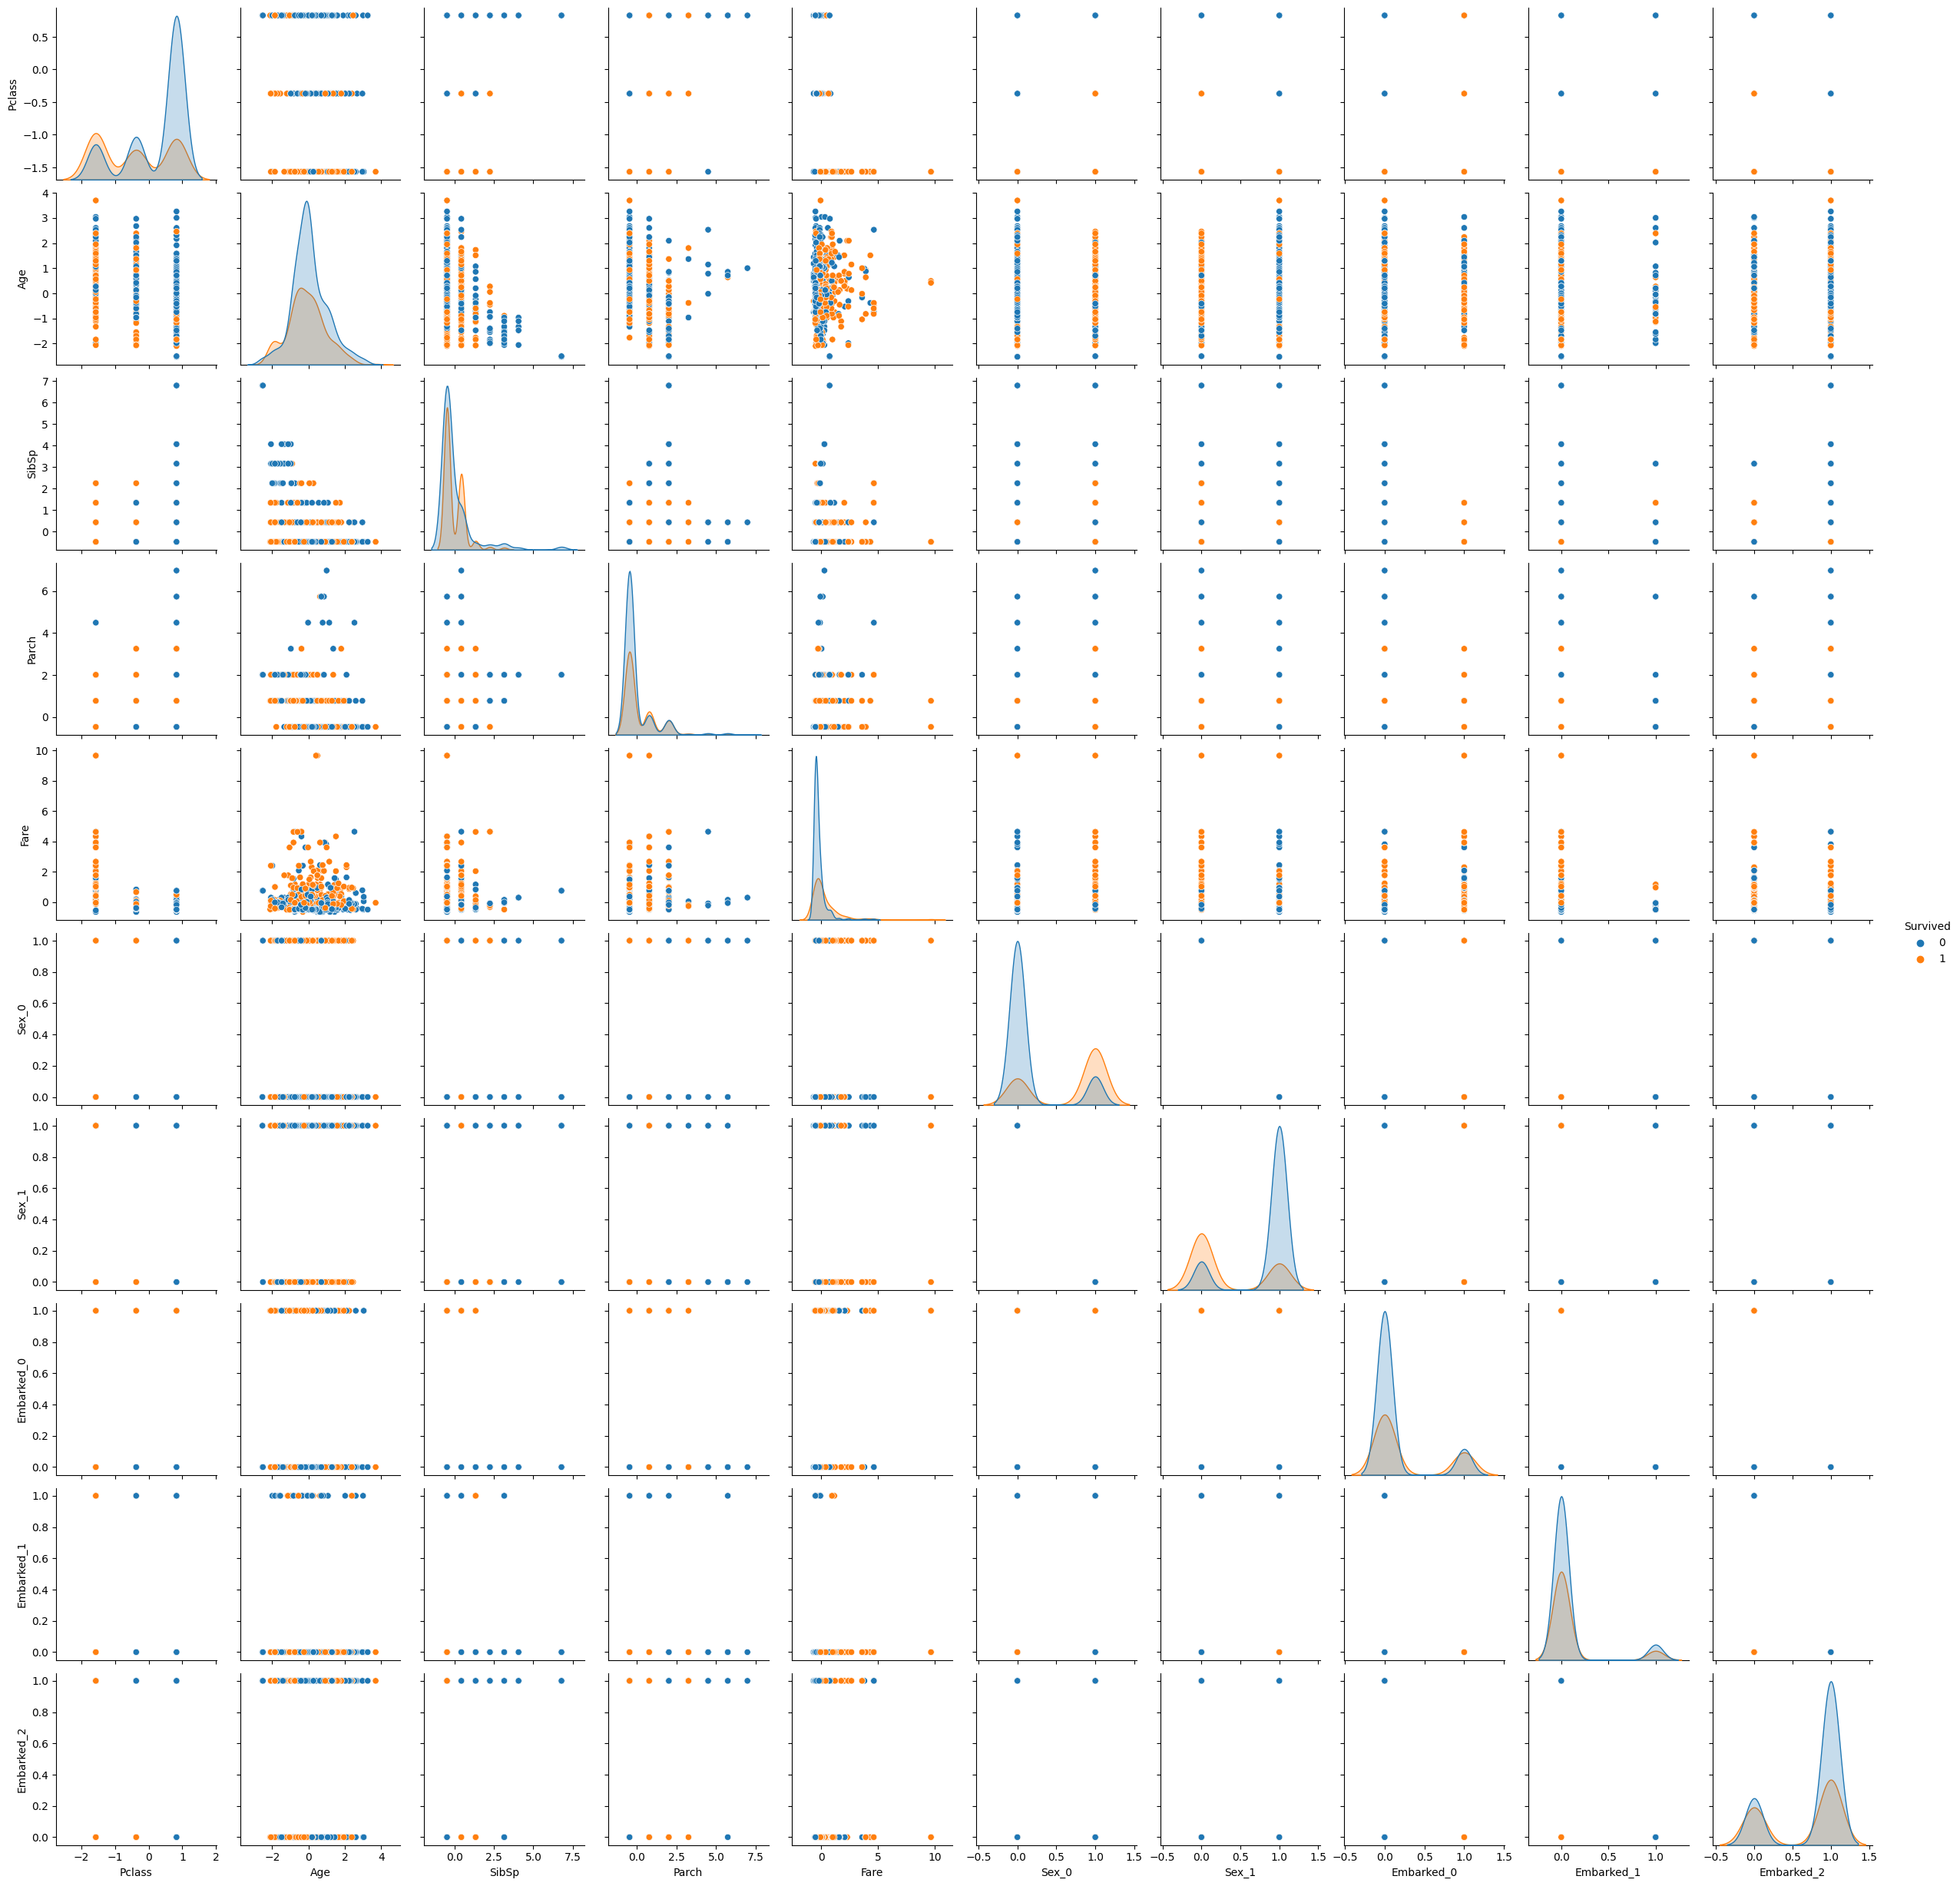

In [16]:
sns.pairplot(train, kind="scatter", hue="Survived")
plt.show()

<Axes: >

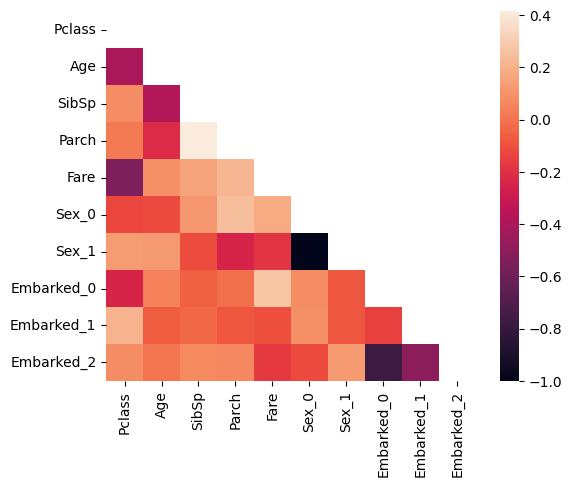

In [17]:
# Drop the outcome:
train_corr = train.drop(["Survived"], axis=1)

# Build heatmap:
corr_matrix = train_corr.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, square=True)

In [18]:
# Define the features and output:
y = np.array(train['Survived'])
X = train.drop('Survived', axis=1)

# Split data into train an test, with test size of 20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Build the model:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate the model:
print("accuracy on training set: %f" % rf.score(X_train, y_train))
print("accuracy on test set: %f" % rf.score(X_test, y_test))

accuracy on training set: 0.992978
accuracy on test set: 0.787709


(0.0, 1.0)

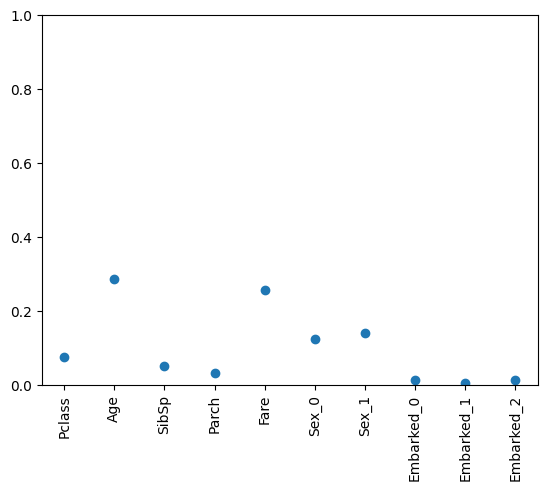

In [19]:
# Build a graphical visualisation of feature importance:
import matplotlib.pyplot as plt
plt.plot(rf.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.ylim(0, 1)

# Create submission

First apply the same modifications.

Then predict, create dataframe, export to csv.

In [20]:
predictIds = data_for_submission['PassengerId']
data_for_submission = data_for_submission.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

data_for_submission['Age'].fillna(data_for_submission['Age'].mean(), inplace=True)
data_for_submission['Fare'].fillna(data_for_submission['Fare'].mean(), inplace=True)

data_for_submission[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']] = StandardScaler().fit_transform(data_for_submission[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']])
data_for_submission


labelencoder = LabelEncoder()
data_for_submission['Sex'] = labelencoder.fit_transform(data_for_submission['Sex'])
data_for_submission['Embarked'] = labelencoder.fit_transform(data_for_submission['Embarked'])
data_for_submission = pd.get_dummies(data_for_submission,prefix=["Sex","Embarked"],columns=['Sex','Embarked'])

In [21]:
predicts = rf.predict(data_for_submission)
predicts

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
submission = pd.DataFrame({'PassengerId': predictIds, 'Survived': predicts})
submission.to_csv('/kaggle/working/submission.csv', index=False)